In [1]:
!gdown --id 15ol8TU9pZHemhbpbW3MJxYa-1gheMDN3

Downloading...
From: https://drive.google.com/uc?id=15ol8TU9pZHemhbpbW3MJxYa-1gheMDN3
To: /content/mask_rcnn_deepfashion2_0100.h5
256MB [00:02, 104MB/s] 


In [2]:
!git clone https://github.com/matterport/Mask_RCNN.git
%cd Mask_RCNN/
!python3 setup.py install

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 32.54 MiB/s, done.
Resolving deltas: 100% (562/562), done.
/content/Mask_RCNN
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:645: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:645: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:645: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running i

In [19]:
%tensorflow_version 1.x
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
import matplotlib.pyplot as plt
from mrcnn.visualize import * 
from mrcnn.visualize import display_instances
from mrcnn import visualize
import skimage 
import cv2
import uuid
import time
from skimage import img_as_ubyte
import skimage.transform
class_names = ['short_sleeved_shirt', 'long_sleeved_shirt', 'short_sleeved_outwear', 'long_sleeved_outwear', 'vest', 'sling', 
               'shorts', 'trousers', 'skirt', 'short_sleeved_dress', 'long_sleeved_dress',
               'vest_dress', 'sling_dress']

class TestConfig(Config):
     NAME = "test"
     GPU_COUNT = 1
     IMAGES_PER_GPU = 1
     NUM_CLASSES = 1 + 13


rcnn = MaskRCNN(mode='inference', model_dir='/content/', config=TestConfig())
rcnn.load_weights('/content/mask_rcnn_deepfashion2_0100.h5', by_name=True)     

Processing 1 images
image                    shape: (100, 100, 3)         min:    2.00000  max:  251.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  144.10000  float64
image_metas              shape: (1, 26)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Time for Prediction : 4.825


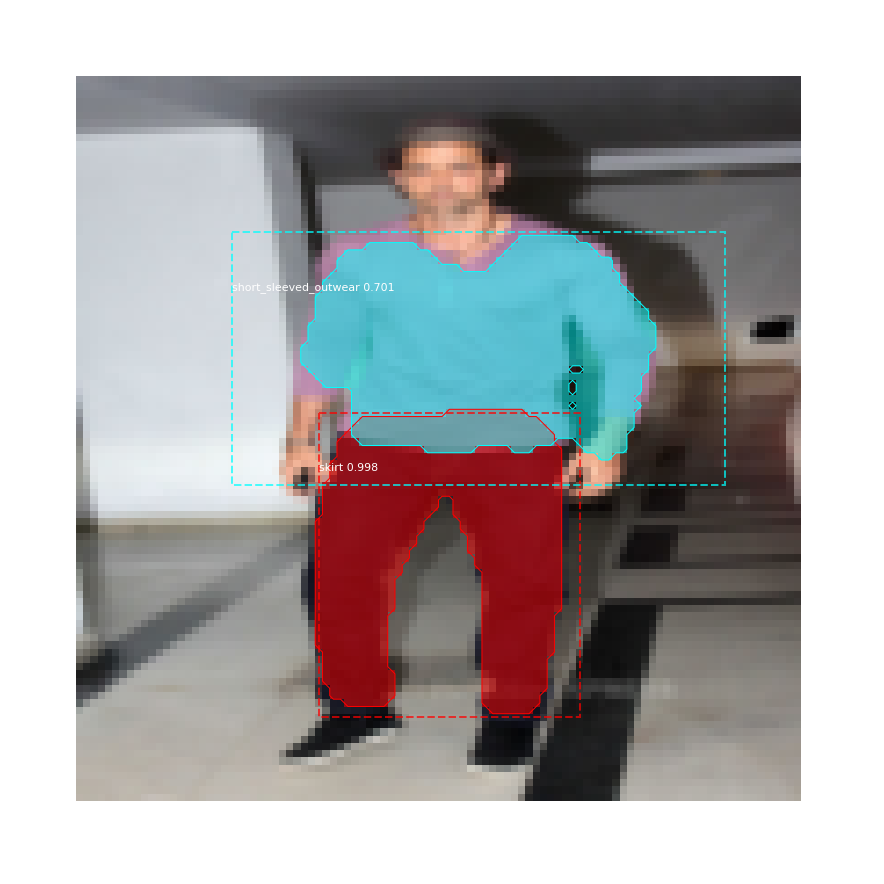

In [20]:
img = skimage.io.imread('/content/2.jpg')
img = img_as_ubyte(skimage.transform.resize(img, (100, 100)))

t = time.time()
results = rcnn.detect([img], verbose=1)
print("Time for Prediction : {:.3f}".format(time.time() - t))

r = results[0]
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])
mask = r['masks']
mask1 = mask.astype(int)
img[:,:,2] = img[:,:,1] * mask1[:,:,1]
skimage.io.imsave("/content/detecteded.jpg",img[:,:,2])


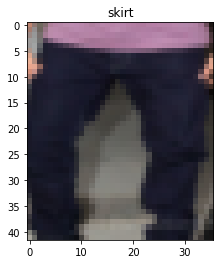

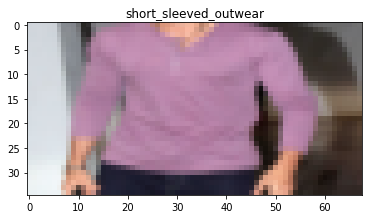

In [21]:
img = skimage.io.imread('/content/2.jpg')
img = img_as_ubyte(skimage.transform.resize(img, (100, 100)))
for i in range(len(r['rois'])):
  x = r['rois'][i][0]
  y = r['rois'][i][1]
  width = r['rois'][i][2]
  height = r['rois'][i][3]
  # img = cv2.imread("/content/2.jpg", cv2.IMREAD_COLOR)
  # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  crop_img = img[x:width, y:height]
  plt.imshow(crop_img)
  # take each class id r['class_ids'][i]
  # from class id take class name 
  plt.title(class_names[r['class_ids'][i]])
  plt.show()